# Transformer Architecture
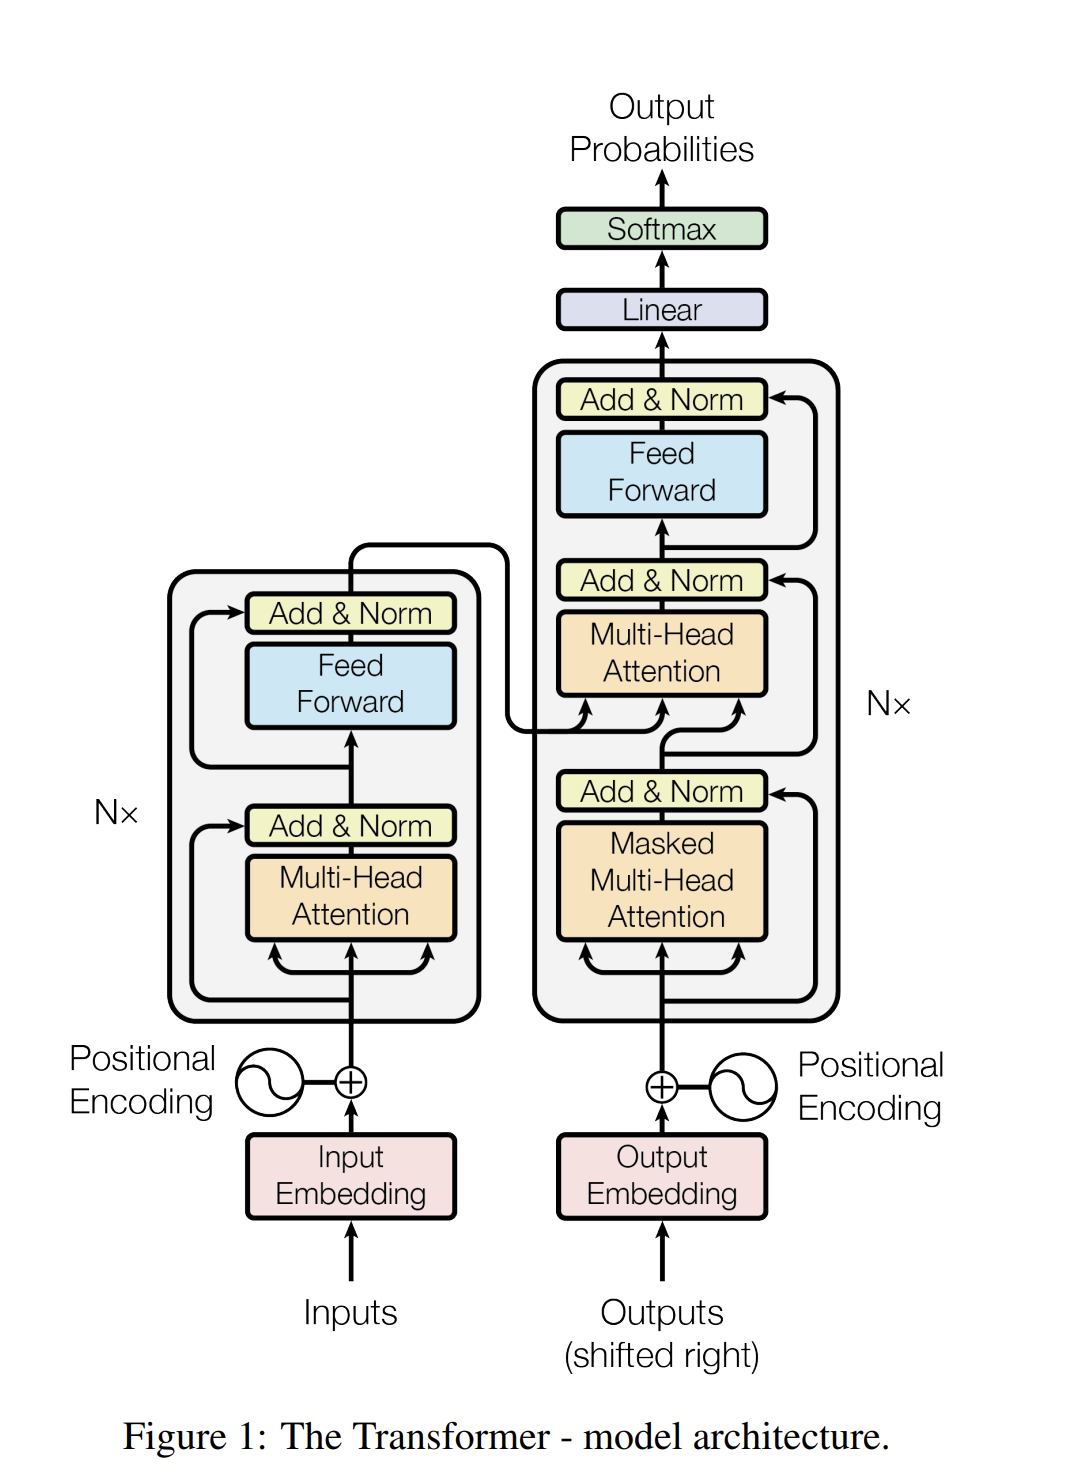


### Encoder

The encoder is responsible for reading the input sequence and transforming it into a continuous representation. It consists of multiple identical layers, each with two main components:

1. **Multi-Head Self-Attention Mechanism**:
   - The self-attention mechanism allows the model to weigh the importance of different words in the input sequence relative to each other.
   - Multi-head attention allows the model to jointly attend to information from different representation subspaces.

2. **Position-Wise Feed-Forward Neural Network**:
   - A fully connected feed-forward network is applied to each position independently and identically.
   - Typically consists of two linear transformations with a ReLU activation in between.

Each encoder layer also includes:
- **Residual Connections**: Add the input of each sub-layer to its output to help with gradient flow.
- **Layer Normalization**: Applied after the addition of residual connections.

The output of each encoder layer serves as the input to the next layer.

### Decoder

The decoder generates the output sequence one token at a time. It also consists of multiple identical layers, each with three main components:

1. **Masked Multi-Head Self-Attention Mechanism**:
   - Similar to the encoder's self-attention, but with a mask to prevent attending to future positions, ensuring the predictions for the current position only depend on the known outputs so far.

2. **Multi-Head Attention Mechanism**:
   - This layer performs attention over the encoder's output, allowing the decoder to focus on relevant parts of the input sequence.

3. **Position-Wise Feed-Forward Neural Network**:
   - Similar to the encoder's feed-forward network.

Each decoder layer also includes residual connections and layer normalization.

### Positional Encoding

Transformer don't have a built-in sense of sequence order (like RNNs do), it uses positional encodings to inject information about the relative or absolute position of tokens in the sequence. These encodings are added to the input embeddings at the bottom of the encoder and decoder stacks.

### Attention Mechanism

We use attention mechanism to capture the meaning of a block size. Each token generates key and query vectors, which are anlogous to:

    - query: what does the token have? is it a noun? is it a color? is it a verb?
    - key: what is in the token? conceptually like the answers to these queries.

1. **Scaled Dot-Product Attention**:
   - The input consists of queries \(Q\), keys \(K\), and values \(V\).
   - The attention scores are computed as the dot product of the query with all keys, scaled by the square root of the dimension of the keys, and passed through a softmax function to obtain weights.
   - The dot prodcut between each key query pair tells us how close the key matches the query.
   - The weighted sum of the values, based on these weights, is the output.

2. **Multi-Head Attention**:
   - Instead of performing a single attention function, the model uses multiple attention heads to allow the model to jointly attend to information from different representation subspaces at different positions.
   - The outputs of all heads are concatenated and linearly transformed.

Attention pattern is the sqaure of context size.

### Advantages of the Transformer

- **Parallelism**: Unlike RNNs, Transformers don't require sequential data processing, allowing for significant parallelization during training.
- **Long-Range Dependencies**: Self-attention allows the model to capture long-range dependencies more effectively than RNNs.
- **Scalability**: Transformers can be scaled to very large sizes, leading to state-of-the-art performance in various NLP tasks.

### Modern Variants

- **BERT (Bidirectional Encoder Representations from Transformers)**: A model that pre-trains on large text corpora using masked language modeling and next sentence prediction tasks.
- **GPT (Generative Pre-trained Transformer)**: A model focused on text generation.
- **T5 (Text-to-Text Transfer Transformer)**: Treats every NLP problem as a text-to-text problem, unifying various tasks into a single framework.



In [3]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [6]:
print("length of dataset: ", len(text))
print(text[:500])

length of dataset:  1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [8]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("vocab size:", vocab_size)
print(''.join(chars))

vocab size: 65

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [16]:
stoi = {ch:i for i, ch in enumerate(chars)}
itos = {i:ch for ch, i in stoi.items()}

encode = lambda s: [stoi[ch] for ch in s]
decode = lambda l: ''.join([itos[i] for i in l])

encode("hi there"), decode(encode("hi there"))

([46, 47, 1, 58, 46, 43, 56, 43], 'hi there')

In [18]:
# encode entire dataset into torch.Tensor
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:200])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59])


In [20]:
# split into train and test
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [23]:
torch.manual_seed(1337)
block_size = 8
batch_size = 4

In [22]:
x = train_data[:block_size]
y = train_data[1:block_size+1]

for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when context is {context} target is {target}")

when context is tensor([18]) target is 47
when context is tensor([18, 47]) target is 56
when context is tensor([18, 47, 56]) target is 57
when context is tensor([18, 47, 56, 57]) target is 58
when context is tensor([18, 47, 56, 57, 58]) target is 1
when context is tensor([18, 47, 56, 57, 58,  1]) target is 15
when context is tensor([18, 47, 56, 57, 58,  1, 15]) target is 47
when context is tensor([18, 47, 56, 57, 58,  1, 15, 47]) target is 58


In [25]:
def get_batch(split):
    data = train_data if split=='train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape) # batch_size, block_size/context_len
print(xb)
print('targets:')
print(yb.shape)
print(yb)

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])


In [61]:
# we can see this print in the above table
for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f"when context is {context} target is {target}")

when context is tensor([24]) target is 43
when context is tensor([24, 43]) target is 58
when context is tensor([24, 43, 58]) target is 5
when context is tensor([24, 43, 58,  5]) target is 57
when context is tensor([24, 43, 58,  5, 57]) target is 1
when context is tensor([24, 43, 58,  5, 57,  1]) target is 46
when context is tensor([24, 43, 58,  5, 57,  1, 46]) target is 43
when context is tensor([24, 43, 58,  5, 57,  1, 46, 43]) target is 39
when context is tensor([44]) target is 53
when context is tensor([44, 53]) target is 56
when context is tensor([44, 53, 56]) target is 1
when context is tensor([44, 53, 56,  1]) target is 58
when context is tensor([44, 53, 56,  1, 58]) target is 46
when context is tensor([44, 53, 56,  1, 58, 46]) target is 39
when context is tensor([44, 53, 56,  1, 58, 46, 39]) target is 58
when context is tensor([44, 53, 56,  1, 58, 46, 39, 58]) target is 1
when context is tensor([52]) target is 58
when context is tensor([52, 58]) target is 1
when context is tenso

In [37]:
# build a bigram model
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(1337)

Typically, an embedding layer is initialized with dimensions (num_tokens, embedding_dim), where:

num_tokens is the size of the vocabulary.
embedding_dim is the dimensionality of the embeddings.

. By initializing the embedding layer with the size (vocab_size, vocab_size), the model directly maps each token to a vector of probabilities over the entire vocabulary. This can be thought of as having an embedding matrix where each row is a distribution over possible next tokens.

In [83]:
class BigramLanguageModel(nn.Module):
    
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, idx, targets=None):
        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # B, T, C
        
        if targets == None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
            
        return logits, loss
    
    def generate(self, idx, max_new_tokens=100):
        for _ in range(max_new_tokens):
            logits, loss = self(idx) # get the predictions
            logits = logits[:, -1, :] # focus only on the last time step, becomes (B, C)
            probs = F.softmax(logits, dim=-1) # apply softmax to get probabilities (B, C)
            idx_next = torch.multinomial(probs, num_samples=1) # sample from the distribution (B, 1)
            idx = torch.cat((idx, idx_next), dim=1) # append sampled index to the running sequence (B, T+1)
        return idx
    

In [57]:
model = BigramLanguageModel(vocab_size)
logits, loss = model(xb, yb)
print(logits.shape, loss.item())

torch.Size([32, 65]) 5.105321884155273


In [60]:
print(decode(model.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=20)[0].tolist()))


G?GQeIGKrI!RD;dOx -H


In [86]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [89]:
epochs = 1000
batch_size = 32

for steps in range(epochs):
    xb, yb = get_batch('train')
    
    # evaluate loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()
    if steps%1000 == 0:
        print(f'{steps:7d}/{epochs:2d}: {loss.item():.4f}')    

      0/1000: 2.4607


In [91]:
print(decode(model.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=1000)[0].tolist()))



Haloyou, hinfor s, duble oknge:
INETIfod,

THal e
And nowsind,'d h fe?
S thout t therin bagawso qu:
KI wigh trausifraue baneselit II
He IARK:
was seecefo p

Finint slo'thatha mysolllerame d frnerpund,

HESwows id awiesf arcotent te o ld, wbl foal.
Fang arore ce,
BEatoreingeeirar mave,
By d pebife havonden, tit 'd ibomis fas
REn hofaren tooorthenseald es
I, now'd'ss wse n at p ar s;
Bit e rem.
ROr.
Y winnge ut IUS:
An aves iler, het wilingrd, bll fourigous I mem, t hanll ngogaledoweendilplare I s k:
Co co th amointhoncopas, E ofearer ord moronourorwo o;
-aro'sos ll s twakiseod.
Sire g;
ARIINGorplibulourorerto?
TI s baicofl:

An
CI ce,
CLUEExpond RDORIMARD:
s toud.
Grsougrd at t h meng
Beerd ysody sthend Imerur at menerat hicesictotreafror ar fo whethe sppir'llaseren fay groonchadd.
Thaices, y bafobay quntobe mb ogef s corouce ais Ouficeshime f tothey anne den omiche'I'd the!
Rourelioreshe hilloverarangroune s r, d-dalome?
I be thich INIIUKIXENRMulth t y.
Yeanofis'stes mbther heshotar 

### Just maths tricks below - for attention layers

In [93]:
torch.manual_seed(1337)
B, T, C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [94]:
# version 1
# the tokens don't comunicate with each other, we want the current token to communicate with the previous tokens.
# the naive way to do this take average of all previous tokens, but this is very lossy
# x[b,t] = mean_{i<=t} x[b,i]

xbow = torch.zeros((B,T,C))

for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t, C)
        xbow[b,t] = torch.mean(xprev, 0)

In [101]:
# version 2
# the above method can be implemented better using matrix multiplication
# we don't want the future tokens to affect to the current one, we only need the previous ones to affect - we use masking.
wei = torch.tril(torch.ones(T,T))
wei = wei / wei.sum(1, keepdims=True)
xbow2 = wei @ x

torch.allclose(xbow, xbow2)

True

In [97]:
wei = torch.tril(torch.ones(T,T)) # weights

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [106]:
# version 3
# we need the weights to create a probability distribution that sum upto 1 => softmax
# 'cause we need the upper half to be zero, through softmax we can get that by setting values as -ve infinity
tril = torch.tril(torch.ones(T,T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=1)
xbow3 = wei @ x


wei, torch.allclose(xbow3, xbow)

(tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
         [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
         [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
         [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]]),
 True)

### Attention layer: Self Attention


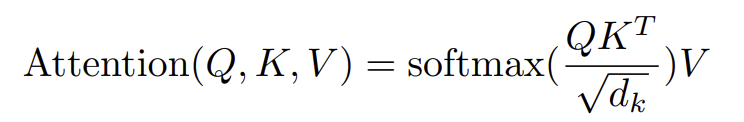

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- In **self-attention** just means that the keys and values are produced from the same source as queries.
- In **cross-attention**, the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- **Scaled attention** additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much.

In [115]:
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time (context length/ block size) , channels (embedding size which can be vocab_size)
x = torch.rand(B,T,C)

head_size = 16
key = nn.Linear(C, head_size, bias = False)
query = nn.Linear(C, head_size, bias = False)
value = nn.Linear(C, head_size, bias = False)

k = key(x) # (B, T, 16)
q = query(x) # (B, T, 16)

wei = q@k.transpose(-2, -1) * head_size**-0.5 # (B, T, 16) @ (B, 16, T) --> (B, T, T)

tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril==0, float('inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v # (B, T, T) @ (B, T, 16) --> (B, T, 16)


out.shape

torch.Size([4, 8, 16])

## Code Time

In [116]:
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(1337)

In [128]:
# hyperparameters
batch_size = 16
block_size = 32
max_iters = 20000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

In [118]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [119]:
class Head(nn.Module):
    """one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        v = self.value(x) # (B,T,C) weighted aggregation of the values
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

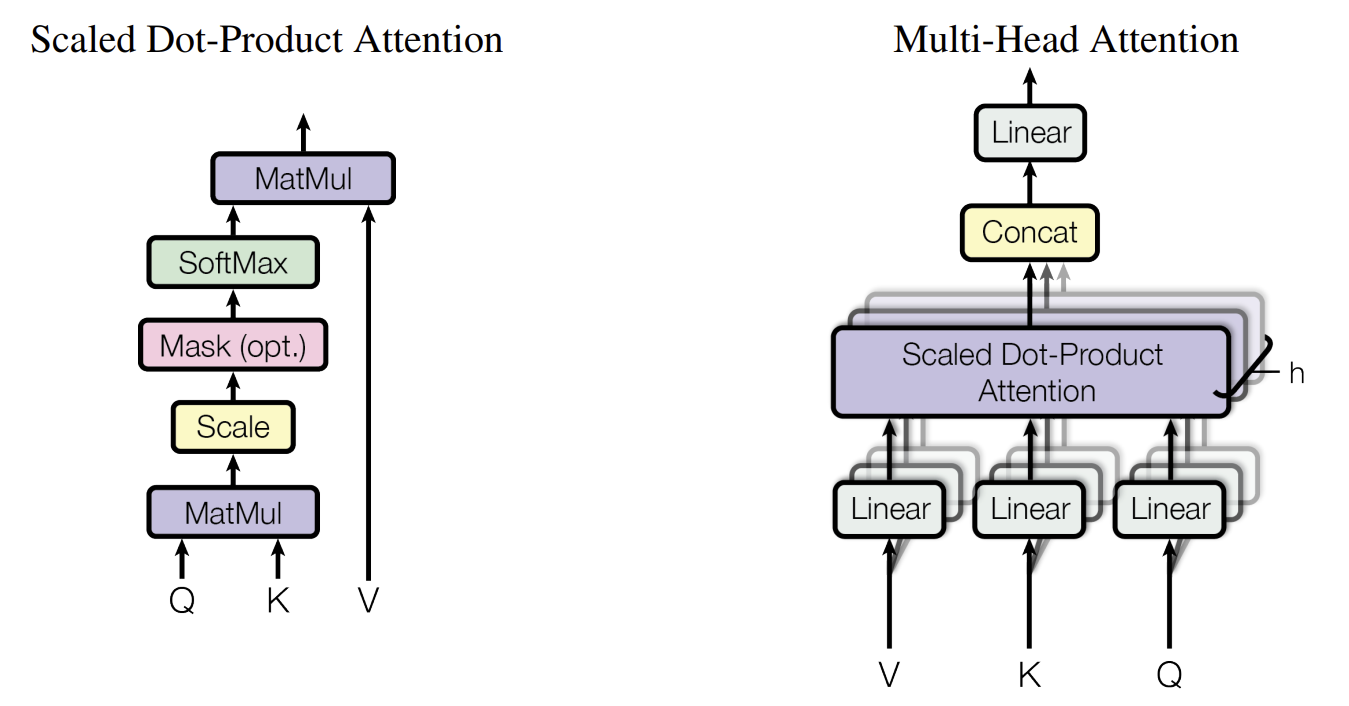

In [120]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

In this original paper we have these dimensions for the attention model, the inner layer is a multiple of 4
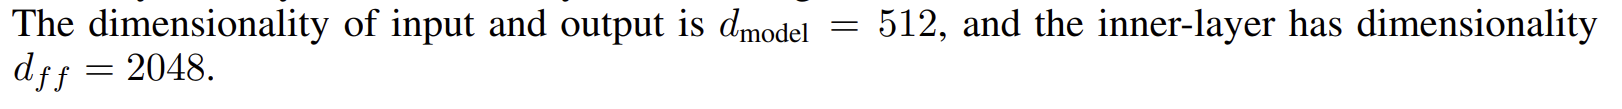

In [121]:
class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd), # multiple of 4
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

This is the block we code next
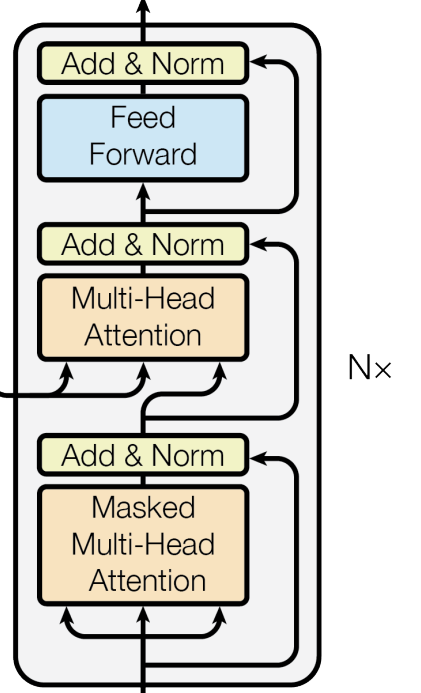

In [122]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [124]:
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx


In [126]:
model = BigramLanguageModel()
m = model.to(device)


print(sum(p.numel() for p in m.parameters()), 'parameters')


209729 parameters


In [127]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [129]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.3823, val loss 4.3857
step 100: train loss 2.6707, val loss 2.6817
step 200: train loss 2.5251, val loss 2.5224
step 300: train loss 2.4224, val loss 2.4419
step 400: train loss 2.3477, val loss 2.3507
step 500: train loss 2.2926, val loss 2.3259
step 600: train loss 2.2418, val loss 2.2602
step 700: train loss 2.2073, val loss 2.2244
step 800: train loss 2.1715, val loss 2.2050
step 900: train loss 2.1153, val loss 2.1565
step 1000: train loss 2.0874, val loss 2.1322
step 1100: train loss 2.0621, val loss 2.1214
step 1200: train loss 2.0399, val loss 2.1072
step 1300: train loss 2.0060, val loss 2.0606
step 1400: train loss 1.9899, val loss 2.0496
step 1500: train loss 1.9734, val loss 2.0424
step 1600: train loss 1.9412, val loss 2.0176
step 1700: train loss 1.9377, val loss 2.0092
step 1800: train loss 1.9120, val loss 1.9970
step 1900: train loss 1.8960, val loss 1.9906
step 2000: train loss 1.8817, val loss 1.9807
step 2100: train loss 1.8626, val loss 1.9699


step 17700: train loss 1.4855, val loss 1.6841
step 17800: train loss 1.4848, val loss 1.6746
step 17900: train loss 1.4888, val loss 1.6822
step 18000: train loss 1.4966, val loss 1.6858
step 18100: train loss 1.4803, val loss 1.6798
step 18200: train loss 1.4771, val loss 1.6902
step 18300: train loss 1.4818, val loss 1.6688
step 18400: train loss 1.4936, val loss 1.6951
step 18500: train loss 1.4885, val loss 1.6711
step 18600: train loss 1.4833, val loss 1.6919
step 18700: train loss 1.4888, val loss 1.6934
step 18800: train loss 1.4855, val loss 1.6855
step 18900: train loss 1.4854, val loss 1.6901
step 19000: train loss 1.4904, val loss 1.6941
step 19100: train loss 1.4743, val loss 1.6928
step 19200: train loss 1.4763, val loss 1.6831
step 19300: train loss 1.4802, val loss 1.6904
step 19400: train loss 1.4723, val loss 1.6937
step 19500: train loss 1.4820, val loss 1.6918
step 19600: train loss 1.4878, val loss 1.6902
step 19700: train loss 1.4779, val loss 1.6834
step 19800: t

In [130]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


Two, give now and mark-jonied convent's Pant,
I am go, every partliany watch, the seal's treasure of mouther's quish!
Sir Servingman: do then he dare, and Edway:
Then thank-piring that in which he.
So that and end: wherehombed, they hope you this parday;
To 'tis wind, speak, where, marrious here, you grave so reason me, ruid! I steal, should it as my son hell.

DUKE VINCENTIO:
It swears at the less on your termious kill my oddigive the joice;
O alverse I causes hair thee.
O, now drub a pity of tender. Their rungly namary,
I have for thee to let lies shall now me.
Therefore, each, if he.

Nurse:
No clet. O vowiond he that tree why.

JULIET:
Where sigh souls
Or feward at your self of Norfolkle
Strikes, I had a mait ist his blow ommity,
Or well that men of priese friends,
The day woman fire heaven upon.

RewoxARD IVEL:
As and take you slew a brow
From zinctize him, so with besusvech. Delieves!

KING EDWARD IV:
Pray Julio cloose, my sine I may could:
The trunk of reseles Juliet, the plane